## Plotting ESHI simulation inputs and results

Rachel Middleton

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
# input paths
inputfile = 'ESHI.input.nc'


In [3]:
# read data
ncfile = Dataset(inputfile, 'r')

In [4]:
print(ncfile.variables.keys())

# print the shape of each variable
for var in ncfile.variables.keys():
    print(var, ncfile.variables[var].shape)

dict_keys(['time', 'x1', 'y1', 'thk', 'topg'])
time (1,)
x1 (25,)
y1 (5,)
thk (1, 5, 25)
topg (1, 5, 25)


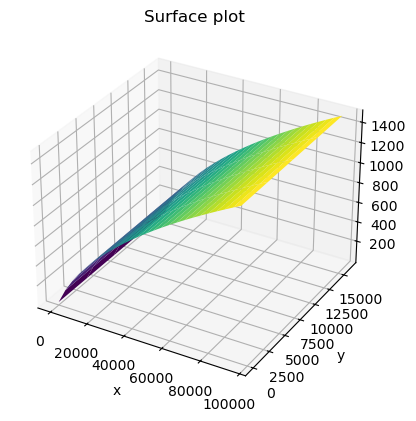

In [5]:
# plot the input geometry
# plot the 2d variable thk with x1 and y1 variables as x and y axes
fig = plt.figure()
ax = plt.axes(projection='3d')
x = ncfile.variables['x1'][:]
y = ncfile.variables['y1'][:]
X, Y = np.meshgrid(x, y)
Z = ncfile.variables['thk'][0][:]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# x and y labels
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()




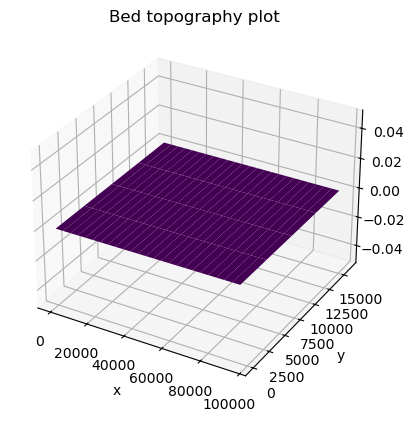

In [6]:
# plot the input geometry
# plot the 2d variable thk with x1 and y1 variables as x and y axes
fig = plt.figure()
ax = plt.axes(projection='3d')
x = ncfile.variables['x1'][:]
y = ncfile.variables['y1'][:]
X, Y = np.meshgrid(x, y)
Z = ncfile.variables['topg'][0][:]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Bed topography plot')
# x and y labels
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [9]:
# make a comparison of all experiements from run A
# read data
inputfileA = 'SteadyStateA/ESHI.SteadyStateA.out.nc'
inputfileB = 'SteadyStateB/ESHI.SteadyStateB.out.nc'
inputfileC = 'SteadyStateC/ESHI.SteadyStateC.out.nc'
inputfileD = 'SteadyStateD/ESHI.SteadyStateD.out.nc'
inputfileE = 'SteadyStateE/ESHI.SteadyStateE.out.nc'
inputfileF = 'SteadyStateF/ESHI.SteadyStateF.out.nc'


ncfileA = Dataset(inputfileA, 'r')
ncfileB = Dataset(inputfileB, 'r')
ncfileC = Dataset(inputfileC, 'r')
ncfileD = Dataset(inputfileD, 'r')
ncfileE = Dataset(inputfileE, 'r')
ncfileF = Dataset(inputfileF, 'r')

[   53974.62  1357874.6   2391446.2   3274822.    4059058.2   4771529.5
  5428939.    6042369.5   6619618.    7166420.    7687138.5   8185184.5
  8663283.    9123657.    9568140.    9998275.   10415366.   10820532.
 11214742.   11598839.   11973563.   12339570.   12697439.   13047692.
 13390796.  ]
[   53974.62  1357874.6   2391446.2   3274822.    4059058.2   4771529.5
  5428939.    6042369.5   6619618.    7166420.    7687138.5   8185184.5
  8663283.    9123657.    9568140.    9998275.   10415366.   10820532.
 11214742.   11598839.   11973563.   12339570.   12697439.   13047692.
 13390796.  ]
[   53974.62  1357874.6   2391446.2   3274822.    4059058.2   4771529.5
  5428939.    6042369.5   6619618.    7166420.    7687138.5   8185184.5
  8663283.    9123657.    9568140.    9998275.   10415366.   10820532.
 11214742.   11598839.   11973563.   12339570.   12697439.   13047692.
 13390796.  ]
[   53974.62  1357874.6   2391446.2   3274822.    4059058.2   4771529.5
  5428939.    6042369.5   66

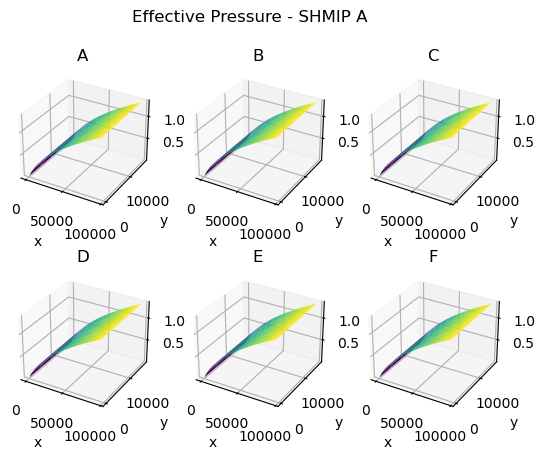

In [11]:
# make a comparison plot

def make_subplot(ax,ncfile,title):
    x = ncfile.variables['x1'][:]
    y = ncfile.variables['y1'][:]
    X, Y = np.meshgrid(x, y)
    Z = ncfile.variables['effecpress'][0][:]
    print(Z[2])
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    # x and y labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')

fig = plt.figure()


ax1 = fig.add_subplot(231, projection='3d')
make_subplot(ax1,ncfileA,'A')

ax2 = fig.add_subplot(232, projection='3d')
make_subplot(ax2,ncfileB,'B')

ax3 = fig.add_subplot(233, projection='3d')
make_subplot(ax3,ncfileC,'C')

ax4 = fig.add_subplot(234, projection='3d')
make_subplot(ax4,ncfileD,'D')

ax5 = fig.add_subplot(235, projection='3d')
make_subplot(ax5,ncfileE,'E')

ax6 = fig.add_subplot(236, projection='3d')
make_subplot(ax6,ncfileF,'F')

plt.suptitle('Effective Pressure - SHMIP A')

plt.show()